## **Project Name:** Petrol Price Forecasting  using Tensor Flow and Auto Keras

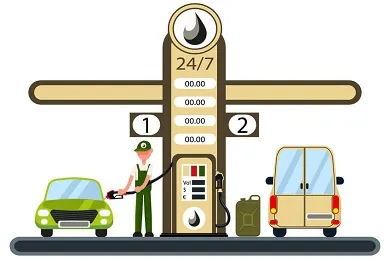

## Petrol Prices are going up continously these days and it has become very hard to predict what will be the price range in the next few months or even days.

### In this project we will try to forecast the different petrol prices for the upcoming dates given to us. 

### We will use LSTM and ARIMA forecasting models to predict the prices then we will see how we can implement the same using Auto Keras, which is an Auto ML Library.

## TimeLine of the project:
- Data Analysis
- Model Building and predictions using ML techniques
- Model Building and prediction using Auto Keras(Auto ML)

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 

In [2]:
df1 = pd.read_csv("train_data.csv")
df1.head()

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


**Data Analysis and splitting the data**

In [3]:
df1.head()
df1.isnull().sum()

Date            0
Petrol (USD)    2
dtype: int64

In [4]:
df2 = df1.dropna()

In [5]:
df2.rename(columns={"Petrol (USD)": "Petrol"}, inplace = True)
df2.head()

C:\Users\sadpa\anaconda3\envs\pyspark\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Date,Petrol
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


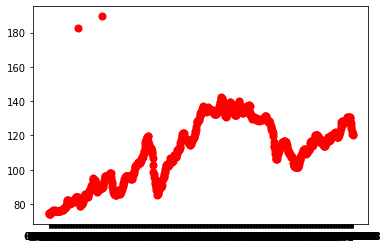

In [6]:
plt.scatter(df2.Date, df2.Petrol,color='red',label='Prices', s=50)

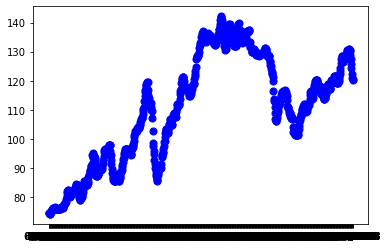

In [7]:
df3=df2[df2.Petrol<160]
plt.scatter(df3.Date, df3.Petrol,color='blue',label='Prices', s=50)


In [8]:
df4=df3.reset_index()['Petrol']
df4.head()

0    74.59
1    74.47
2    74.42
3    74.35
4    74.28
Name: Petrol, dtype: float64

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df4=scaler.fit_transform(np.array(df4).reshape(-1,1))

In [10]:
df4

array([[0.00559152],
       [0.00382578],
       [0.00309005],
       [0.00206004],
       [0.00103002],
       [0.        ],
       [0.0126545 ],
       [0.01309594],
       [0.01339023],
       [0.01809888],
       [0.02354326],
       [0.02707475],
       [0.02825191],
       [0.02972337],
       [0.02928193],
       [0.0285462 ],
       [0.02751619],
       [0.03266627],
       [0.02486757],
       [0.02707475],
       [0.02633902],
       [0.02633902],
       [0.02545615],
       [0.02530901],
       [0.02663331],
       [0.02633902],
       [0.02589759],
       [0.02575044],
       [0.02516186],
       [0.02545615],
       [0.02457328],
       [0.02486757],
       [0.03163626],
       [0.03281342],
       [0.033402  ],
       [0.03369629],
       [0.03281342],
       [0.03193055],
       [0.03104768],
       [0.03708064],
       [0.04679223],
       [0.04752796],
       [0.04973514],
       [0.05370806],
       [0.05400235],
       [0.05635668],
       [0.06165391],
       [0.074

In [11]:
training_size=int(len(df4)*0.65)
test_size=len(df4)-training_size
train_data,test_data=df4[0:training_size,:],df4[training_size:len(df4),:1]

In [12]:
train_data.shape
test_data.shape

(284, 1)

**Data Preprocessing**

In [13]:
 import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [14]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [15]:
X_train

array([[0.00559152, 0.00382578, 0.00309005, ..., 0.16627428, 0.16524426,
        0.1640671 ],
       [0.00382578, 0.00309005, 0.00206004, ..., 0.16524426, 0.1640671 ,
        0.16274279],
       [0.00309005, 0.00206004, 0.00103002, ..., 0.1640671 , 0.16274279,
        0.15538552],
       ...,
       [0.91024132, 0.91597999, 0.90847557, ..., 0.88419659, 0.88655091,
        0.88743378],
       [0.91597999, 0.90847557, 0.88802237, ..., 0.88655091, 0.88743378,
        0.87154208],
       [0.90847557, 0.88802237, 0.88449088, ..., 0.88743378, 0.87154208,
        0.87639788]])

In [16]:
y_train

array([0.16274279, 0.15538552, 0.14670394, 0.14420247, 0.15862272,
       0.16642142, 0.18422602, 0.19540906, 0.19894055, 0.21100647,
       0.21762802, 0.22130665, 0.22748676, 0.2405827 , 0.24367275,
       0.2532372 , 0.29664509, 0.30694526, 0.29723367, 0.28134197,
       0.28399058, 0.29487934, 0.29326074, 0.283402  , 0.26868746,
       0.24014126, 0.21188935, 0.19334903, 0.19334903, 0.19114185,
       0.19643908, 0.20114773, 0.20335491, 0.21115362, 0.21777516,
       0.22572101, 0.23057681, 0.22836963, 0.22719247, 0.22645674,
       0.2230724 , 0.22572101, 0.23513832, 0.24941142, 0.25853443,
       0.27310182, 0.29458505, 0.31106533, 0.32254267, 0.32739847,
       0.32636845, 0.32210124, 0.31121248, 0.30944673, 0.31312537,
       0.31238964, 0.30547381, 0.30988817, 0.31606828, 0.33357858,
       0.34682166, 0.34755739, 0.35079459, 0.34741024, 0.316804  ,
       0.29708652, 0.27472042, 0.25412007, 0.22910536, 0.20585639,
       0.18746321, 0.18231313, 0.17216009, 0.16965862, 0.16759

In [17]:
print(X_train.shape), print(y_train.shape)

(424, 100)
(424,)


(None, None)

# LSTM 

In [18]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [20]:
!pip install tensorflow

  Using cached tensorflow-2.8.0-cp39-cp39-win_amd64.whl (438.0 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorboard-2.8.0-py3-none-any.whl (5.8 MB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached gast-0.5.3-py3-none-any.whl (19 kB)
  Using cached libclang-13.0.0-py2.py3-none-win_amd64.whl (13.9 MB)
  Using cached tensorflow_io_gcs_filesystem-0.24.0-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached keras-2.8.0-py2.py3-none-any.whl (1.4 MB)
  Using cached tf_estimator_nightly-2.8.0.dev2021122109-py2.py3-none-any.whl (462 kB)
  Using cached flatbuffers-2.0-py2.py3-none-any.whl (26 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached Markdown-3.3.6-py3-none-any.whl (97 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (7

In [21]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [22]:
print(X_train.shape), print(y_train.shape)

(424, 100, 1)
(424,)


(None, None)

In [23]:

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [24]:
model.fit(X_train,
          y_train,
          validation_data=(X_test,ytest),
          epochs=100,
          batch_size=64,
          verbose=1)

Epoch 1/100
7/7 [==============================] - 4s 207ms/step - loss: 0.1537 - val_loss: 0.0685
Epoch 2/100
7/7 [==============================] - 1s 88ms/step - loss: 0.0282 - val_loss: 0.0175
Epoch 3/100
7/7 [==============================] - 1s 84ms/step - loss: 0.0206 - val_loss: 0.0048
Epoch 4/100
7/7 [==============================] - 1s 84ms/step - loss: 0.0131 - val_loss: 0.0059
Epoch 5/100
7/7 [==============================] - 1s 84ms/step - loss: 0.0089 - val_loss: 0.0045
Epoch 6/100
7/7 [==============================] - 1s 84ms/step - loss: 0.0082 - val_loss: 0.0060
Epoch 7/100
7/7 [==============================] - 1s 84ms/step - loss: 0.0068 - val_loss: 0.0035
Epoch 8/100
7/7 [==============================] - 1s 83ms/step - loss: 0.0062 - val_loss: 0.0043
Epoch 9/100
7/7 [==============================] - 1s 84ms/step - loss: 0.0064 - val_loss: 0.0034
Epoch 10/100
7/7 [==============================] - 1s 84ms/step - loss: 0.0066 - val_loss: 0.0035
Epoch 11/100
7/7 [

7/7 [==============================] - 1s 89ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 84/100
7/7 [==============================] - 1s 90ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 85/100
7/7 [==============================] - 1s 90ms/step - loss: 0.0010 - val_loss: 8.4453e-04
Epoch 86/100
7/7 [==============================] - 1s 89ms/step - loss: 9.0568e-04 - val_loss: 9.9185e-04
Epoch 87/100
7/7 [==============================] - 1s 90ms/step - loss: 0.0010 - val_loss: 7.8261e-04
Epoch 88/100
7/7 [==============================] - 1s 89ms/step - loss: 0.0011 - val_loss: 7.6141e-04
Epoch 89/100
7/7 [==============================] - 1s 89ms/step - loss: 8.9475e-04 - val_loss: 7.8829e-04
Epoch 90/100
7/7 [==============================] - 1s 90ms/step - loss: 8.8166e-04 - val_loss: 8.5944e-04
Epoch 91/100
7/7 [==============================] - 1s 93ms/step - loss: 9.7333e-04 - val_loss: 9.7680e-04
Epoch 92/100
7/7 [==============================] - 1s 90ms/step - loss: 0.001

In [25]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [26]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

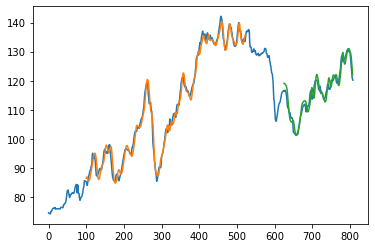

In [27]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df4)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df4)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df4)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df4))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [28]:
df_test=pd.read_csv("test_data.csv")
df_test.head()

,Date,Prediction
0,1/1/2019,NaN
1,1/2/2019,NaN
2,1/3/2019,NaN
3,1/4/2019,NaN
4,1/5/2019,NaN


In [29]:
model.save("petrolpriceprediction")

INFO:tensorflow:Assets written to: petrolpriceprediction\assets


INFO:tensorflow:Assets written to: petrolpriceprediction\assets


## **Using ARIMA**

In [30]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import datetime 
from matplotlib import pyplot

from sklearn.metrics import mean_squared_error
from math import sqrt

C:\Users\sadpa\AppData\Local\Temp\ipykernel_17088\4219278593.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [31]:
df = pd.read_csv("train_data.csv")
df.head()

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


In [32]:
df.rename(columns={"Petrol (USD)": "Petrol"}, inplace = True)
df.head()

,Date,Petrol
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


In [33]:
df2 = df.dropna()
df3=df2[df2.Petrol<160]
df3.head()


,Date,Petrol
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


In [34]:
df4=df3.reset_index()['Petrol']
df4.head()

0    74.59
1    74.47
2    74.42
3    74.35
4    74.28
Name: Petrol, dtype: float64

In [35]:
model1 = ARIMA(df4.values, order=(5,1,0))
model_fit1 = model1.fit()
output1= model_fit1.forecast(steps=30)
output1

array([119.80670595, 119.52143345, 119.30634686, 119.14818589,
       119.02925475, 118.93899196, 118.87071703, 118.81917608,
       118.78030426, 118.75097697, 118.72883999, 118.71212988,
       118.69951734, 118.68999809, 118.68281349, 118.67739086,
       118.67329807, 118.67020899, 118.66787749, 118.66611776,
       118.66478959, 118.66378715, 118.66303054, 118.66245949,
       118.66202848, 118.66170317, 118.66145765, 118.66127233,
       118.66113246, 118.6610269 ])

# Using Auto ML

 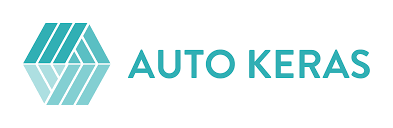

## AutoKeras: An AutoML system based on Keras. It is developed by DATA Lab at Texas A&M University

## Installing Auto Keras

In [37]:
!pip install git+https://github.com/keras-team/keras-tuner.git@1.0.2rc1


  Cloning https://github.com/keras-team/keras-tuner.git (to revision 1.0.2rc1) to c:\users\sadpa\appdata\local\temp\pip-req-build-sy0kl2ps
  Resolved https://github.com/keras-team/keras-tuner.git to commit 0fb69434a132093518e0e53d40020145ae192629
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2rc1-py3-none-any.whl size=86074 sha256=dde78067674bbd70e7a79574ffe75a9676499b3015225a5223b1d6e2a79f7655
  Stored in directory: C:\Users\sadpa\AppData\Local\Temp\pip-ephem-wheel-cache-wk3rgah3\wheels\09\45\88\7fa744f0be0acc5be797cd02899455d419c94645f428e79d15
Successfully built keras-tuner


  Running command git clone -q https://github.com/keras-team/keras-tuner.git 'C:\Users\sadpa\AppData\Local\Temp\pip-req-build-sy0kl2ps'
  Running command git checkout -q 0fb69434a132093518e0e53d40020145ae192629


In [38]:
!pip install autokeras

  Using cached autokeras-1.0.18-py3-none-any.whl (160 kB)
  Using cached keras_tuner-1.1.0-py3-none-any.whl (98 kB)
  Using cached kt_legacy-1.0.4-py3-none-any.whl (9.6 kB)


  Attempting uninstall: keras-tuner
    Found existing installation: keras-tuner 1.0.2rc1
    Uninstalling keras-tuner-1.0.2rc1:
      Successfully uninstalled keras-tuner-1.0.2rc1


In [39]:
!pip show autokeras

Name: autokeras
Version: 1.0.18
Summary: AutoML for deep learning
Home-page: http://autokeras.com
Author: DATA Lab, Keras Team
Author-email: jhfjhfj1@gmail.com
License: Apache License 2.0
Location: c:\users\sadpa\anaconda3\envs\pyspark\lib\site-packages
Requires: packaging, tensorflow, pandas, keras-tuner
Required-by: 


In [40]:
import numpy as np
import pandas as pd
import tensorflow as tf
import autokeras as ak

In [41]:
reg = ak.StructuredDataRegressor(
    overwrite=True, max_trials=3
)

In [45]:
X_train.shape, y_train.shape

((424, 100, 1), (424,))

In [46]:
X_train = X_train.reshape(424, 100)

In [47]:
reg.fit(x=X_train, y=y_train)

Trial 3 Complete [00h 00m 03s]
val_loss: 0.008170828223228455

Best val_loss So Far: 0.008170828223228455
Total elapsed time: 00h 00m 08s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


14/14 [==============================] - 1s 1ms/step - loss: 0.5300 - mean_squared_error: 0.5300
INFO:tensorflow:Assets written to: .\structured_data_regressor\best_model\assets


INFO:tensorflow:Assets written to: .\structured_data_regressor\best_model\assets


In [48]:

# evaluate the model
mae, _  = reg.evaluate(X_test, ytest, verbose=0)
#print('MAE: %.3f' % mae)
# use the model to make a prediction
yhat_test = reg.predict(X_test)

# get the best performing model
model = reg.export_model()


6/6 [==============================] - 0s 1ms/step


In [49]:
# summarize the loaded model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 multi_category_encoding (Mu  (None, 100)              0         
 ltiCategoryEncoding)                                            
                                                                 
 normalization (Normalizatio  (None, 100)              201       
 n)                                                              
                                                                 
 dense (Dense)               (None, 256)               25856     
                                                                 
 re_lu (ReLU)                (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                8224  

In [50]:
yhat_train= reg.predict(X_train)

14/14 [==============================] - 0s 1ms/step


In [51]:
train_predict=scaler.inverse_transform(yhat_train)
test_predict=scaler.inverse_transform(yhat_test)

In [52]:
from sklearn.metrics import mean_squared_error

In [53]:
mean_squared_error(ytest,yhat_test)

0.14781959877432235

In [54]:
mean_squared_error(y_train,yhat_train)

0.3180932548344992